In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Import Capital Bike Share DataFrames
df_h = pd.read_csv('hour.csv')
df_d = pd.read_csv('day.csv')

In [5]:
print(df_h.shape)
print(df_d.shape)

(17379, 17)
(731, 16)


In [10]:
df_h.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [66]:
df_h.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
SEASON         object
HOLIDAY        object
WEEKDAY        object
WORKINGDAY     object
WEATHERSIT     object
HR             object
dtype: object

In [213]:
df_h.corr().abs()[['cnt']]

,cnt
instant,0.278379
season,0.178056
yr,0.250495
mnth,0.120638
hr,0.394071
holiday,0.030927
weekday,0.026900
workingday,0.030284
weathersit,0.142426
temp,0.404772


## 

In [215]:
df_h.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [65]:
df_h.isnull().sum()

instant           0
dteday            0
season            0
yr                0
mnth              0
hr                0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
SEASON            0
HOLIDAY           0
WEEKDAY           0
WORKINGDAY        0
WEATHERSIT        0
HR            15921
dtype: int64

In [69]:
df_h.loc[df_h['season'] == 1, 'SEASON'] = 'Spring'
df_h.loc[df_h['season'] == 2, 'SEASON'] = 'Summer'
df_h.loc[df_h['season'] == 3, 'SEASON'] = 'Fall/Autumn'
df_h.loc[df_h['season'] == 4, 'SEASON'] = 'Winter'

In [71]:
df_h.SEASON.value_counts()

Fall/Autumn    4496
Summer         4409
Spring         4242
Winter         4232
Name: SEASON, dtype: int64

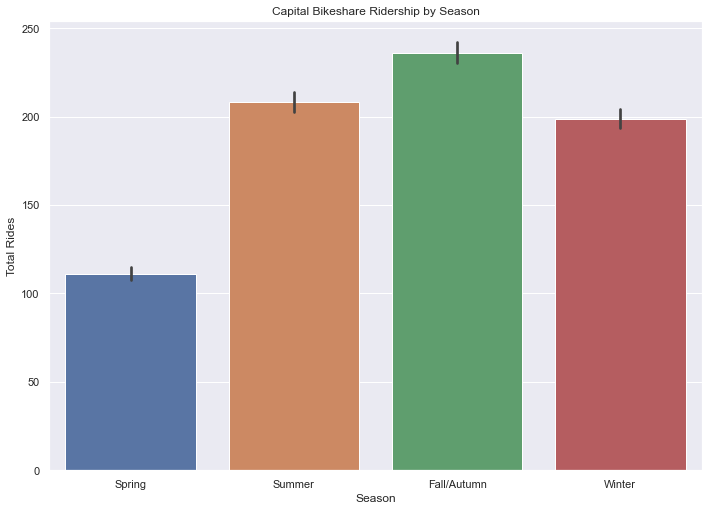

In [217]:
fig, ax = plt.subplots()
sns.barplot(data=df_h[['SEASON','cnt']], x='SEASON', y='cnt', ax=ax)

plt.title('Capital Bikeshare Ridership by Season')
plt.ylabel('Total Rides')
plt.xlabel('Season')
plt.show()

In [218]:
df_h.loc[df_h['mnth'] == 1, 'MONTH'] = 'Jan'
df_h.loc[df_h['mnth'] == 2, 'MONTH'] = 'Feb'
df_h.loc[df_h['mnth'] == 3, 'MONTH'] = 'Mar'
df_h.loc[df_h['mnth'] == 4, 'MONTH'] = 'Apr'
df_h.loc[df_h['mnth'] == 5, 'MONTH'] = 'May'
df_h.loc[df_h['mnth'] == 6, 'MONTH'] = 'Jun'
df_h.loc[df_h['mnth'] == 7, 'MONTH'] = 'Jul'
df_h.loc[df_h['mnth'] == 8, 'MONTH'] = 'Aug'
df_h.loc[df_h['mnth'] == 9, 'MONTH'] = 'Sep'
df_h.loc[df_h['mnth'] == 10, 'MONTH'] = 'Oct'
df_h.loc[df_h['mnth'] == 11, 'MONTH'] = 'Nov'
df_h.loc[df_h['mnth'] == 12, 'MONTH'] = 'Dec'

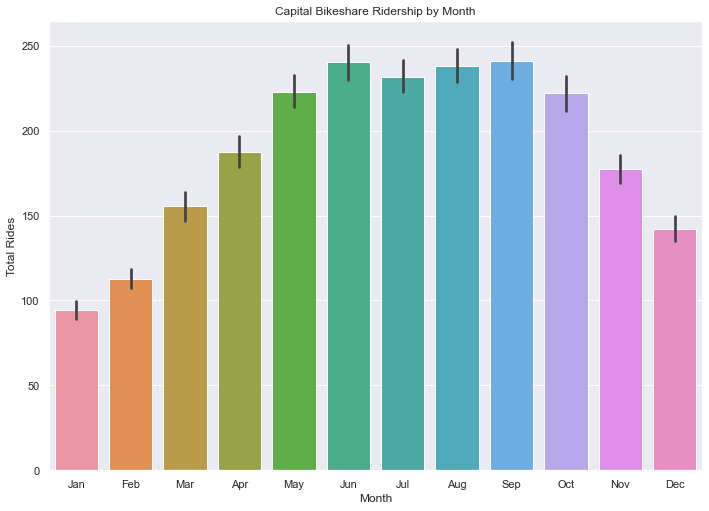

In [219]:
fig, ax = plt.subplots()
sns.barplot(data=df_h[['MONTH','cnt']], x='MONTH', y='cnt', ax=ax)

plt.title('Capital Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')
plt.show()

In [221]:
df_h.loc[df_h['weathersit'] == 1, 'WEATHERSIT'] = 'Clear'
df_h.loc[df_h['weathersit'] == 2, 'WEATHERSIT'] = 'Cloudy'
df_h.loc[df_h['weathersit'] == 3, 'WEATHERSIT'] = 'Light_Rain'
df_h.loc[df_h['weathersit'] == 4, 'WEATHERSIT'] = 'Heavy_Rain'

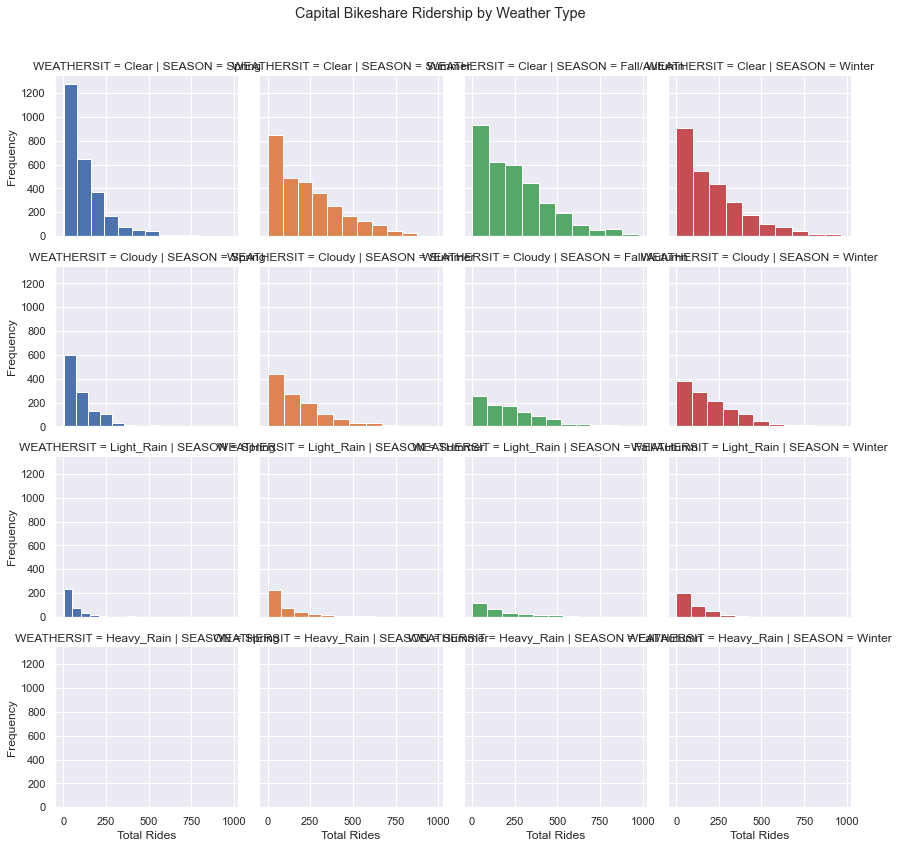

In [220]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]

g = sns.FacetGrid(data=df_h, col='SEASON', row='WEATHERSIT',hue='SEASON')
g.map(plt.hist,'cnt')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Capital Bikeshare Ridership by Weather Type')

g.set_xlabels('Total Rides')
g.set_ylabels('Frequency')

plt.show()

In [216]:
df_h.loc[df_h['weekday'] == 0, 'WEEKDAY'] = 'Sunday'
df_h.loc[df_h['weekday'] == 1, 'WEEKDAY'] = 'Monday'
df_h.loc[df_h['weekday'] == 2, 'WEEKDAY'] = 'Tuesday'
df_h.loc[df_h['weekday'] == 3, 'WEEKDAY'] = 'Wednesday'
df_h.loc[df_h['weekday'] == 4, 'WEEKDAY'] = 'Thursday'
df_h.loc[df_h['weekday'] == 5, 'WEEKDAY'] = 'Friday'
df_h.loc[df_h['weekday'] == 6, 'WEEKDAY'] = 'Saturday'

In [228]:
df_h.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'SEASON', 'HOLIDAY', 'WEEKDAY',
       'WORKINGDAY', 'WEATHERSIT', 'HR', 'MONTH'],
      dtype='object')

<AxesSubplot:>

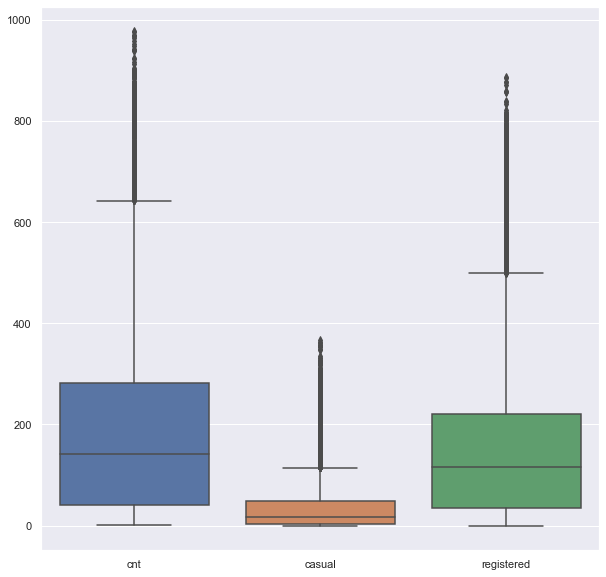

In [229]:
fig = plt.subplot()
sns.boxplot(data=df_h[['cnt', 'casual', 'registered']])

<AxesSubplot:xlabel='WEEKDAY', ylabel='cnt'>

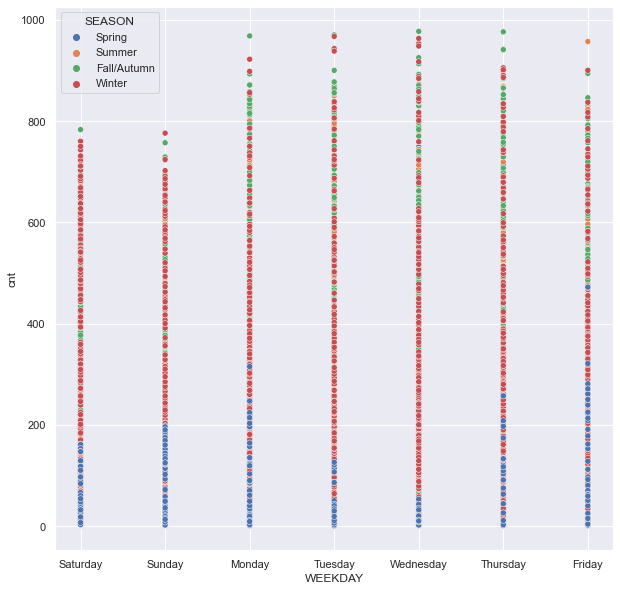

In [222]:
sns.scatterplot(data=df_h, x='WEEKDAY', y='cnt', hue='SEASON')

In [72]:
df_h.loc[df_h['holiday'] == 0, 'HOLIDAY'] = 'No'
df_h.loc[df_h['holiday'] == 1, 'HOLIDAY'] = 'Yes'

In [74]:
df_h.loc[df_h['workingday'] == 0, 'WORKINGDAY'] = 'No'
df_h.loc[df_h['workingday'] == 1, 'WORKINGDAY'] = 'Yes'

In [280]:
#df.loc[((df['Age'] > 0) & (df['Age'] <=10))]
df_h.loc[((df_h['hr'] >= 0) & (df_h['hr'] <= 5)) , 'HR'] = 'Mid_Night'
df_h.loc[((df_h['hr'] >= 5) & (df_h['hr'] <= 10)) , 'HR'] = 'Peak-hr_1'
df_h.loc[((df_h['hr'] >= 10) & (df_h['hr'] <= 14)) , 'HR'] = 'Afternoon'
df_h.loc[((df_h['hr'] >= 14) & (df_h['hr'] <= 20)) , 'HR'] = 'Peak-hr_2'
df_h.loc[((df_h['hr'] >= 20) & (df_h['hr'] <= 21)) , 'HR'] = 'Evening'
df_h.loc[((df_h['hr'] >= 21) & (df_h['hr'] <= 23)) , 'HR'] = 'Night'

In [230]:
df_h.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'SEASON', 'HOLIDAY', 'WEEKDAY',
       'WORKINGDAY', 'WEATHERSIT', 'HR', 'MONTH'],
      dtype='object')

In [ ]:
df_h.HR.value_counts()

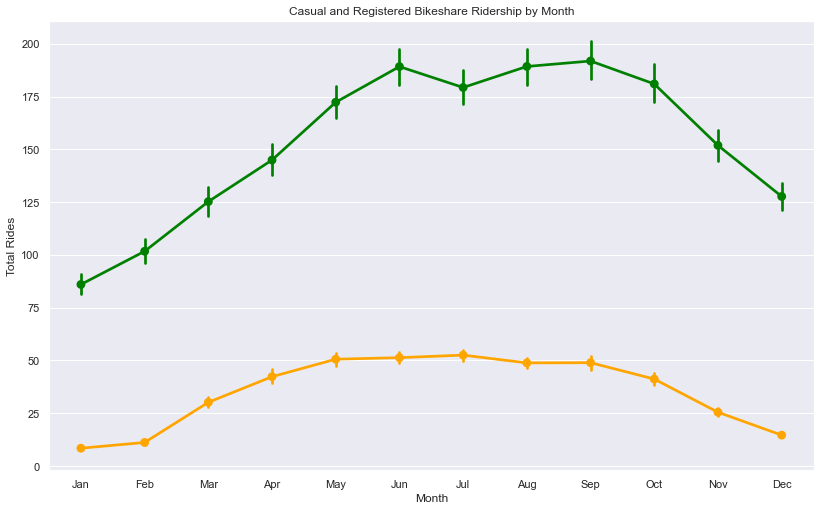

In [237]:
fig, ax = plt.subplots()
sns.pointplot(data=df_h[['MONTH', 'casual', 'registered']], x='MONTH', y='casual', ax=ax, color='orange')

sns.pointplot(data=df_h[['MONTH', 'casual', 'registered']], x='MONTH', y='registered', ax=ax, color='green')

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')

plt.show()

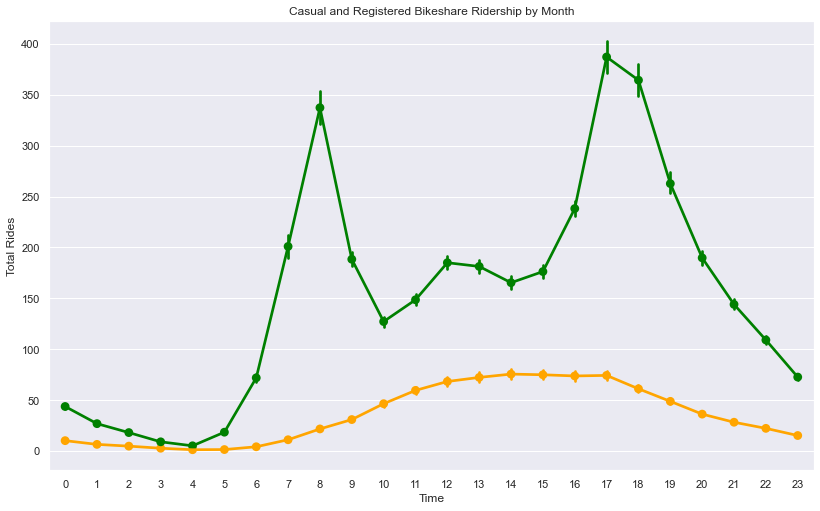

In [247]:
fig, ax = plt.subplots()
sns.pointplot(data=df_h[['hr', 'casual', 'registered']], x='hr', y='casual', ax=ax, color='orange')

sns.pointplot(data=df_h[['hr', 'casual', 'registered']], x='hr', y='registered', ax=ax, color='green')

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Time')

plt.show()

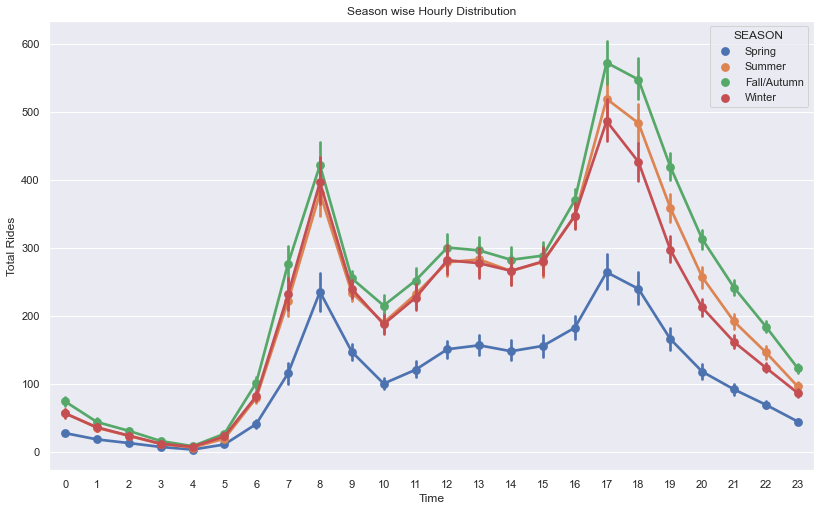

In [244]:
fig, ax = plt.subplots()
sns.pointplot(data=df_h[['hr', 'cnt', 'SEASON']], x='hr', y='cnt', hue= 'SEASON')

plt.title('Season wise Hourly Distribution')
plt.ylabel('Total Rides')
plt.xlabel('Time')

plt.show()

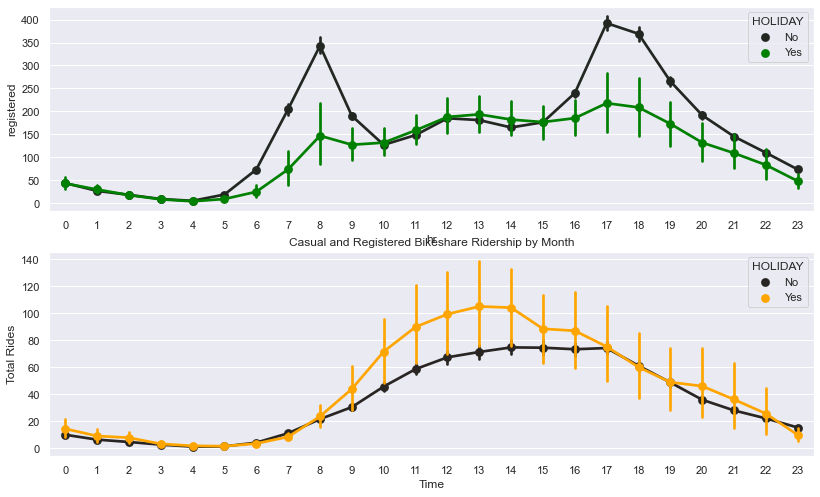

In [256]:
fig, ax = plt.subplots(2,1)

sns.pointplot(data=df_h[['hr', 'HOLIDAY', 'casual', 'registered']], x='hr', y='registered' , hue= 'HOLIDAY', ax=ax[0], color='green')
sns.pointplot(data=df_h[['hr', 'HOLIDAY', 'casual', 'registered']], x='hr', y='casual', hue= 'HOLIDAY', ax=ax[1], color='orange')

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Time')

plt.show()

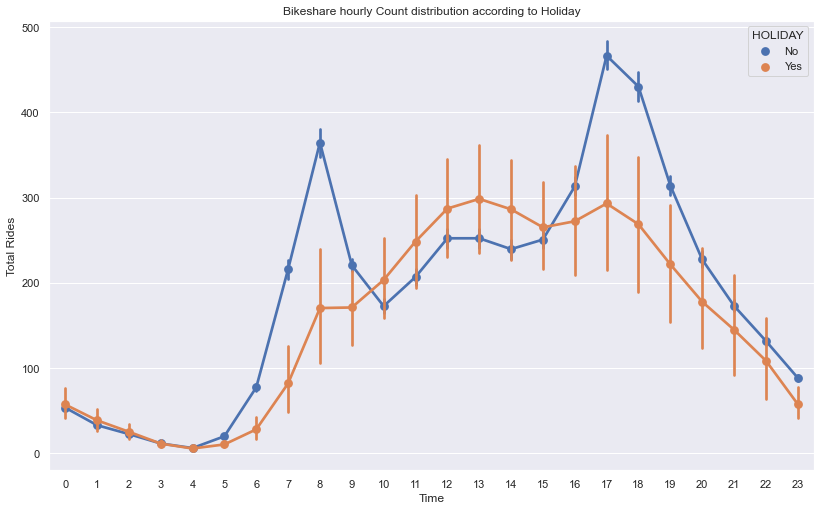

In [257]:
fig, ax = plt.subplots()
sns.pointplot(data=df_h[['hr', 'HOLIDAY', 'cnt']], x='hr', y='cnt', hue= 'HOLIDAY')

plt.title('Bikeshare hourly Count distribution according to Holiday')
plt.ylabel('Total Rides')
plt.xlabel('Time')

plt.show()

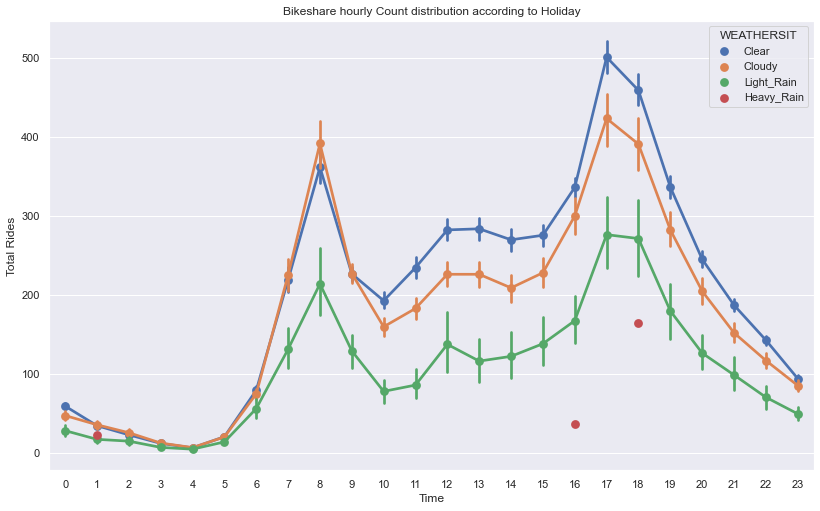

In [260]:
fig, ax = plt.subplots()
sns.pointplot(data=df_h[['hr', 'WEATHERSIT', 'cnt']], x='hr', y='cnt', hue= 'WEATHERSIT')

plt.title('Bikeshare hourly Count distribution according to Holiday')
plt.ylabel('Total Rides')
plt.xlabel('Time')

plt.show()

(0.0, 24.15)

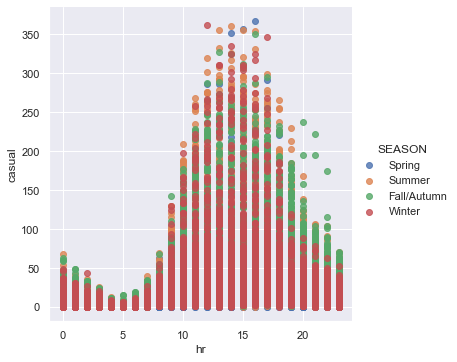

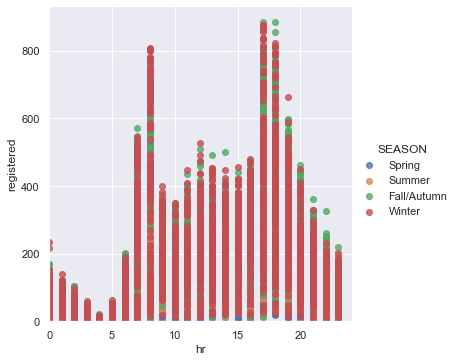

In [271]:
#fig, ax = plt.subplots(2,1)
sns.lmplot(x='hr', y='casual', data=df_h, fit_reg=False, hue='SEASON')
sns.lmplot(x='hr', y='registered', data=df_h, fit_reg=False, hue='SEASON')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

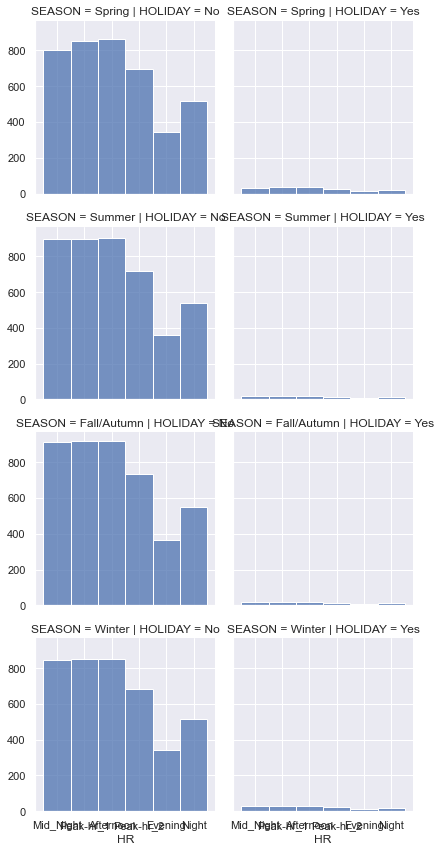

In [281]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
g = sns.FacetGrid(df_h, row='SEASON', col='HOLIDAY')
g.map(sns.histplot, 'HR')
plt.show()

<AxesSubplot:xlabel='hr', ylabel='cnt'>

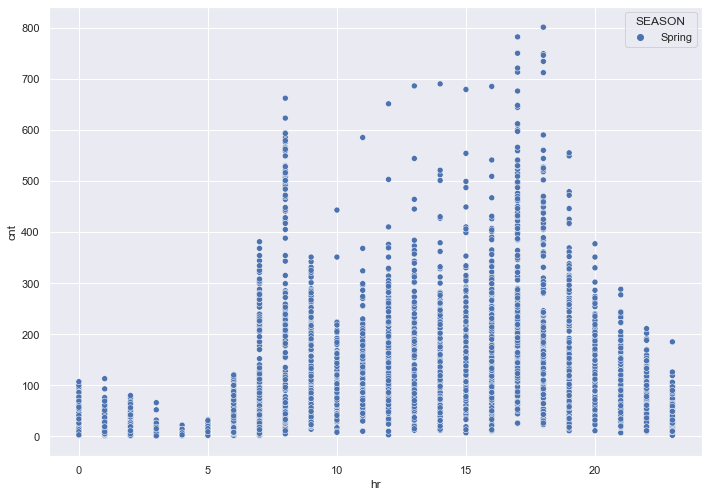

In [181]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='hr', y='cnt', hue='SEASON', data=(df_h[df_h['SEASON']=='Spring']), style='SEASON', legend='full')

<AxesSubplot:xlabel='hr', ylabel='cnt'>

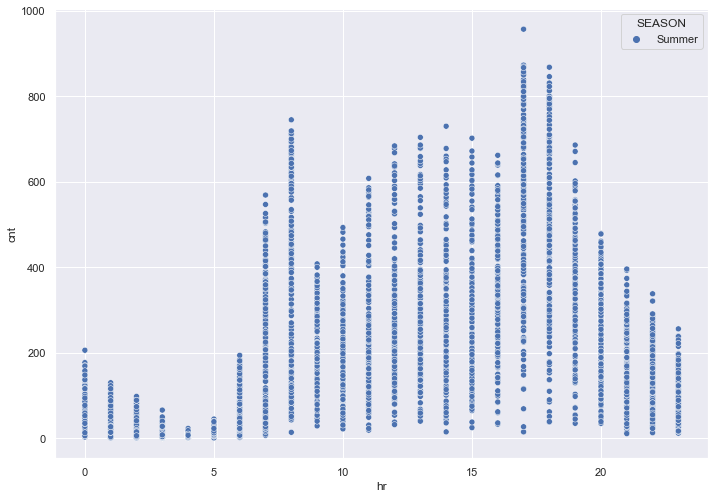

In [182]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='hr', y='cnt', hue='SEASON', data=(df_h[df_h['SEASON']=='Summer']), style='SEASON', legend='full')

<AxesSubplot:xlabel='temp', ylabel='cnt'>

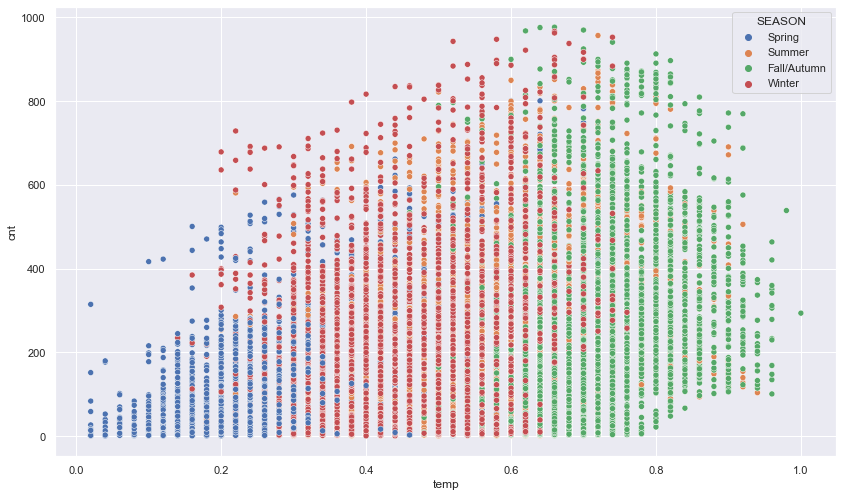

In [183]:
sns.set(rc={'figure.figsize':(14,8.27)})
sns.scatterplot(data=df_h, x='temp', y='cnt', hue='SEASON')

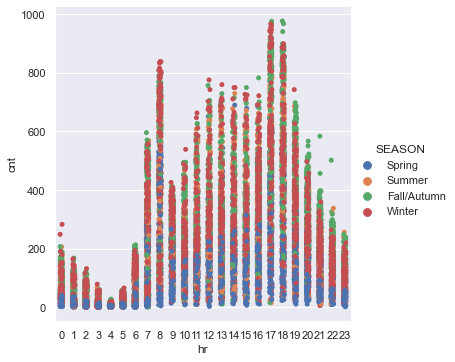

In [185]:
sns.set(rc={'figure.figsize':(14,8.27)})
sns.catplot(x='hr', y='cnt', hue='SEASON', data=df_h)

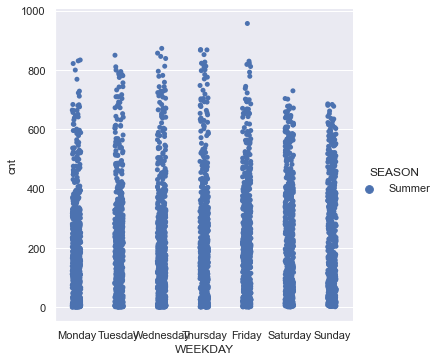

In [186]:
sns.catplot(x='WEEKDAY', y='cnt', hue='SEASON', data=(df_h[df_h['SEASON']=='Summer']))

<AxesSubplot:xlabel='SEASON', ylabel='count'>

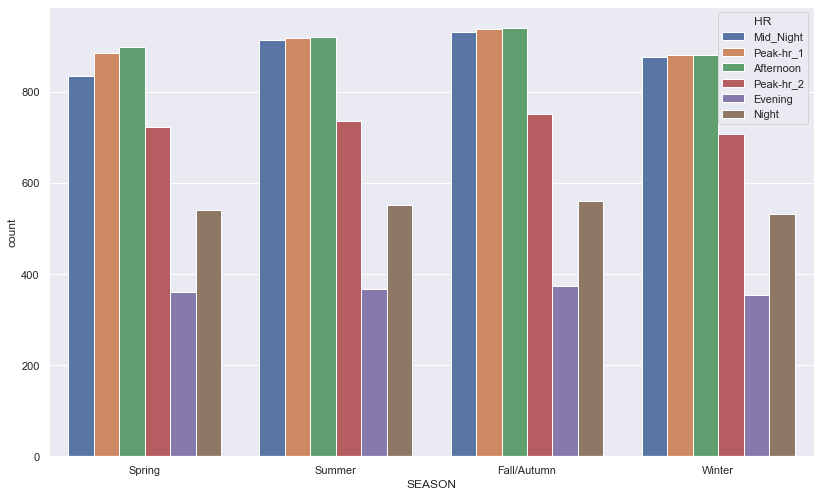

In [282]:
sns.countplot(x='SEASON', data=df_h, hue='HR', dodge=True)

<AxesSubplot:xlabel='WEEKDAY', ylabel='count'>

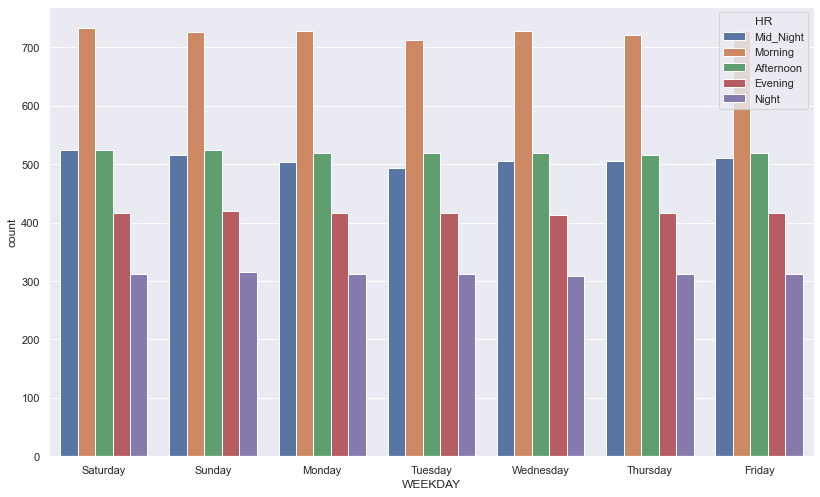

In [276]:
sns.countplot(x='WEEKDAY', data=df_h, hue='HR', dodge=True)

<AxesSubplot:xlabel='HR', ylabel='count'>

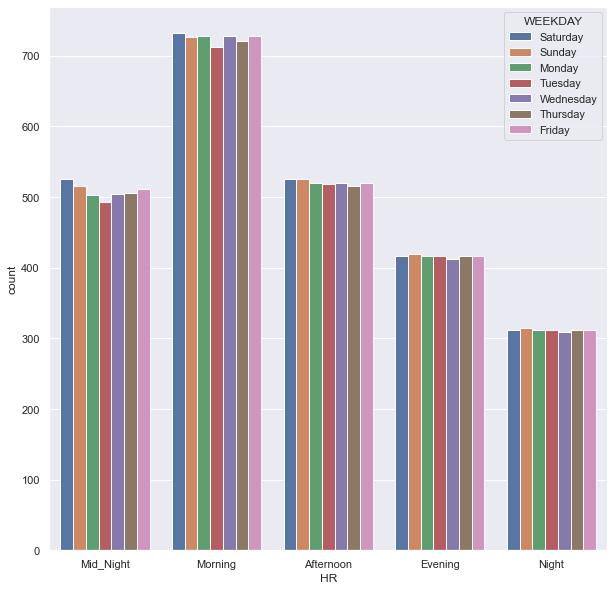

In [226]:
sns.countplot(x='HR', data=df_h, hue='WEEKDAY', dodge=True)

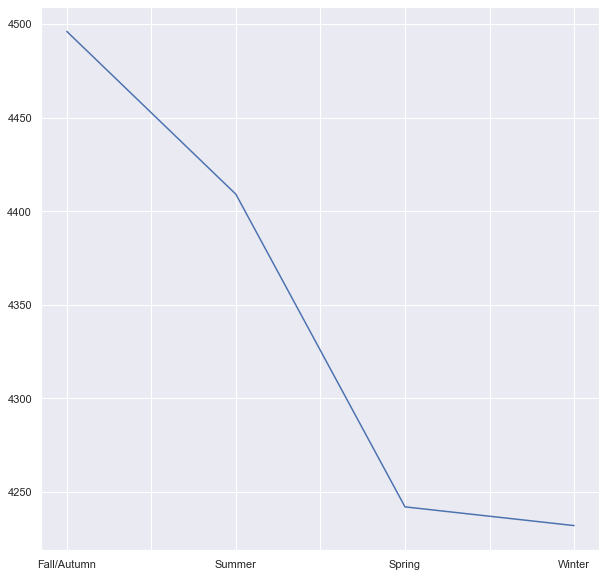

In [227]:
df_h['SEASON'].value_counts().plot(kind="line").yaxis.get_major_formatter().set_scientific(False)

<AxesSubplot:xlabel='HR', ylabel='cnt'>

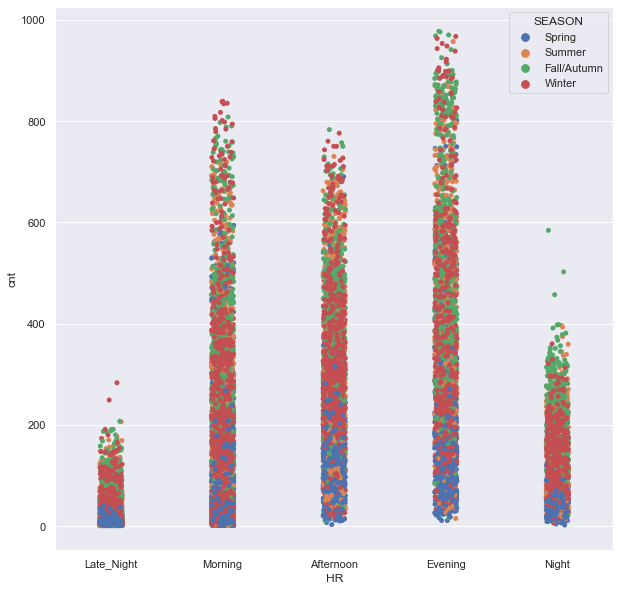

In [201]:
sns.stripplot(x='HR', y='cnt', hue='SEASON', data=df_h)

In [272]:
df_h.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'SEASON', 'HOLIDAY', 'WEEKDAY',
       'WORKINGDAY', 'WEATHERSIT', 'HR', 'MONTH'],
      dtype='object')

In [275]:
from sklearn.feature_extraction import DictVectorizer
 
 
 # We put the attributes of continuous values ​​into a dict
featureConCols = ['temp','atemp','hum','windspeed','hr']
dataFeatureCon = df_h[featureConCols]
dataFeatureCon = dataFeatureCon.fillna( 'NA' ) #in case I missed any
X_dictCon = dataFeatureCon.T.to_dict().values() 
 
 # Put the discrete value attribute in another dict
featureCatCols = ['season','holiday','workingday','weathersit','weekday']
dataFeatureCat = df_h[featureCatCols]
dataFeatureCat = dataFeatureCat.fillna( 'NA' ) #in case I missed any
X_dictCat = dataFeatureCat.T.to_dict().values() 
 
 # Vectorized features
vec = DictVectorizer(sparse = False)
X_vec_cat = vec.fit_transform(X_dictCat)
X_vec_con = vec.fit_transform(X_dictCon)

print(X_vec_cat)


[[0. 1. 1. 6. 0.]
 [0. 1. 1. 6. 0.]
 [0. 1. 1. 6. 0.]
 ...
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1.]]
